In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd
import numpy.random as random

### Review of lecture 16

In lecture 16 we learned:

1) some basic statistical concepts 


2) How to calculate theoretical distributions given the equation.

3) How to simulate data from various distributions.  

4) How to estimate the central tendency (mean), spread of the data (variance or standard deviation), and 95% confidence in the mean (1.97 Standard Error). 


### In this lecture we will:

1) Learn about the log normal distribution. 

2) Learn some useful functions in NumPy and SciPy for simulating distributions and calculating statistics.

3) Learn some statistical tests: t-test, F-test

4) Learn some non-parametric approaches to statistical testing (bootstrap, jackknife).  


In the last lecture, we learned about binomial, uniform and  normal distributions.   For the latter, we learned how to calculate the mean and standard deviation of the data using the **NumPy** functions, **mean( )** and **std( )**.   

Now we need to look at one last distribution:  the log-normal distribution.








### Log normal

Many things in nature are not normally distributed.  Many processes lead to distributions in which the log of the quantity is normally distributed instead of the quantity itself.  For example, grain sizes in sedimentary sequences are often log normally distributed.  These distributions are _log-normal_ and behave differently than normal distributions.  

#### Theoretical

 The equation for the log-normal probability density function is this: 

$$P=f(x,\mu, \sigma)= \frac{1}{x\sigma \sqrt{2\pi}} \exp {\bigl(-\frac{(\text{ln}(x)-\mu)^2}{2\sigma^2}}\bigr),0< x < \infty$$

Notice that $x$ is in the denominator so we can't evaluate the probability when x=0.  So we can't start with x=0. 

As before we make a lambda function  to evaluate the probability density of log-normal distributions:



In [2]:
# Here is a log normal probability density function maker: 
LogNormal=lambda x,mu,sigma : (1./(x*sigma*np.sqrt(2.*np.pi)))*np.e**(-((np.log(x)-mu)**2)/(2.*sigma**2))





And we evaluate it for a range of possible values of $x$ for given $\mu, \sigma$.

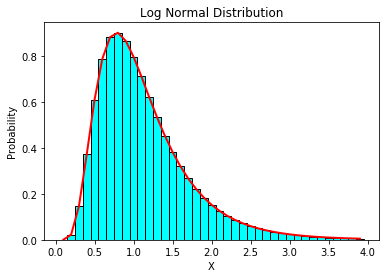

In [3]:
# calculate the probability of returning a value x with a normal distribution with mu and sigma
mu,sigma,incr=0,.5,.1 # set the mean,  standard deviation and bin width
xs=np.arange(incr,4,incr) # make an array of test values
Probability=LogNormal(xs,mu,sigma) # get probabilities for the array of Xs
plt.bar(xs,Probability,width=incr,color='cyan', edgecolor='k') # make the bar chart
plt.plot(xs,Probability,'r-',linewidth=2) # plot as a continuous probability distribution
plt.title('Log Normal Distribution')
plt.xlabel('X')
plt.ylabel('Probability');

#### Empirical

To  simulate data, we can use **random.lognormal( )**, specifying mean and standard deviation as for the normal distribution. 

Here we plot the theoretical distribution and the  simulated data, along with its mean and the $\pm \sigma$ bounds calculated as we did in the last lecture for normal distributions.

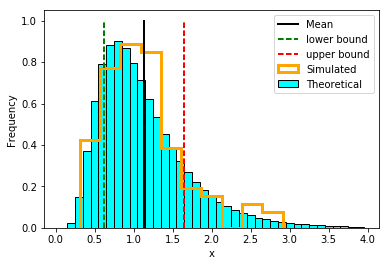

In [4]:
mu,sigma=0,.5 # set the mean,  standard deviation
Nmc=100 # number of monte carlo simultions
Simulated=random.lognormal(mu,sigma,Nmc) # get Nmc  simulated data points from distribution
plt.bar(xs,Probability,width=incr,color='cyan',edgecolor='k',label='Theoretical') # make the bar chart
plt.hist(Simulated,normed=True,histtype='step',color='orange',linewidth=3.,label='Simulated') # plot them
plt.plot([Simulated.mean(),Simulated.mean()],[0,1],'k-',linewidth=2,label='Mean')
plt.plot([Simulated.mean()-Simulated.std(),Simulated.mean()-Simulated.std()],[0,1],
        'g--',linewidth=2,label='lower bound')
plt.plot([Simulated.mean()+Simulated.std(),Simulated.mean()+Simulated.std()],[0,1],
        'r--',linewidth=2,label='upper bound')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.legend();


### Hey! 

Why is the mean way off to the right?  And those confidence bounds don't look right at all!  

It turns out that the mean as defined in the last lecture is only good for 'normal' distributions and shouldn't be used for other types. 

First, let's look at the plot using the log normal of the data instead of the data themselves:  



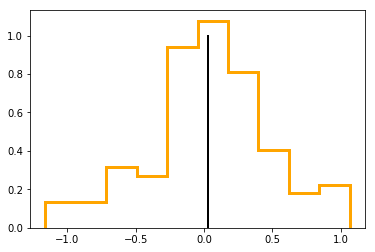

In [5]:

barx=np.log(Simulated).mean() # get the  mean of the logs of the  simulated data set
s=np.log(Simulated).std() # get the standard deviation of same
#plt.hist(np.log(Simulated),normed=True,bins=20,histtype='step') # plot them
plt.hist(np.log(Simulated),normed=True,histtype='step',color='orange',linewidth=3) # plot them 
#plt.plot(xs,Probability,'r-',linewidth=2,label='Probability'); # plot the theoretical probability distribution function
plt.plot([barx,barx],\
         [0,1],'k-',linewidth=2);





It appears that a log normal distribution looks more "normal" when plotted on a log scale.  But the mean doesn't behave the way we expect for normal distributions (offset to the long tail). 

So what would be a sensible way of describing the _central tendency_ (Expectation $E$) and spread (_variance_)  for a log normal distribution? 

These are expressed as follows: 

$$E(x) =\exp\bigr( \mu +\frac{1}{2}\sigma^2 \bigl),$$

and 

$$ \text{var}(x) = \bigr[\exp (\sigma^2)-1\bigr]*\exp(2\mu + \sigma^2)$$

where $\mu, \sigma$ are the mean and standard deviation of the logs of the population.  For the sample, we will refer to them at $\bar x$ and $s$ respectively and for the expectation and variance we will use $m$ and $v$.  

Fortunately, there is a nice **SciPy** package that does statistics for log normal distributions.  **SciPy** is a very powerful package of scientific python functions, many of which were later incorporated into **NumPy**, but not all.  One of the "leftovers" is   **scipy.stats.lognorm**.  You can take a look at what **lognorm** can do for us using help(lognorm) if you are curious.  

In [6]:
import scipy.stats as stats
help(stats.norm)

Help on norm_gen in module scipy.stats._continuous_distns object:

class norm_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  A normal continuous random variable.
 |  
 |  The location (loc) keyword specifies the mean.
 |  The scale (scale) keyword specifies the standard deviation.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `norm` is::
 |  
 |      norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)
 |  
 |  The survival function, ``norm.sf``, is also referred to as the
 |  Q-function in some contexts (see, e.g.,
 |  `Wikipedia's <https://en.wikipedia.org/wiki/Q-function>`_ definition).
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      norm_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, data, **kwds)
 |      Return MLEs for shape, location, and scale parameters from d

The function **stats.norm** returns 'moments' of data samples,  the first two of which are the log normal mean ($m$) and the variance $v$.

So, we should do the following: 
- calculate the mean $\bar x$, and standard deviation $s$  of the LOG of the simulated dataset, 
- set the **scale** to be $e^{\bar x}$
- calculate the first few moments, mean ($m$) and variance ($v$).  

Now we can calculate the moments, $m$ and $v$ and compare them to the originals $\bar x$ and $s$ and the $\mu$ and $\sigma$ of the theoretical distribution used to generate the simulated data: 

In [7]:

m,v=stats.lognorm.stats(s,moments='mv',scale=np.exp(barx))
print ('mu  %5.2f'%(mu),' and barx %5.2f'%(barx))
print ('sigma %5.2f'%(sigma),' and s %5.2f'%(s))
print ('E %5.2f'%(np.exp(mu + 0.5*sigma**2)),' and m %5.2f'%(m))
print ('var %5.3f'%((np.e**(sigma**2)-1)*np.e**(2*mu+sigma**2)),' \
       and v  %5.3f'%(v))



mu   0.00  and barx  0.03
sigma  0.50  and s  0.44
E  1.13  and m  1.14
var 0.365         and v  0.277


So a log normal distribution looks more "normal" when plotted on a log scale.  But the mean doesn't behave the way we expect for normal distributions (offset to the long tail).    Fortunately, there are several other ways of calculating central tendencies:  the _median_ and the _mode_.  The _median_ is the value that cuts the data in half and the _mode_ is the most frequently observed value.  These are less prone to outliers and "look" like a better estimate of the true central tendency.  


There is a **NumPy** function to calculate the median (**np.median( )**) and  for the mode we can use **scipy.stats.mode( )**.  But be careful with this  because it finds the most frequent value, which may have a bunch of significant figures and so each value occurs only once.  To get a reasonable estimate of the  mode, we first have to round off the numbers in **Simulated**.  We can use **np.round()** for that.  

Here's how to calculate each of these types of expected values:  




In [8]:
mean=Simulated.mean() # you knew this already
mean_other_way =np.mean(Simulated) # this is a different way, but works the same.  
median=np.median(Simulated) # this is the way to do the median with NumPy
mode,count=stats.mode(np.round(Simulated,1)) # round to 2 significant digits, return mode and number in that mode
print ('mean: ',mean)
print ('mean other way: ',mean_other_way)
print ('median: ',median)
print ('mode: ',mode,' count: ',count)



mean:  1.13338785345
mean other way:  1.13338785345
median:  1.04129344965
mode:  [ 0.8]  count:  [16]


Notice that **mode** and **count** are both lists.   

So let's plot up the data and put  the  mean, median and the mode on it.

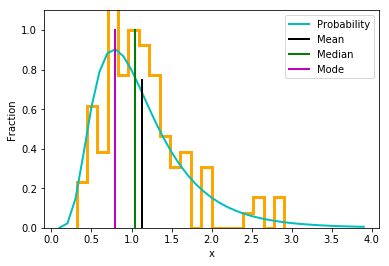

In [9]:
newmode=mode[0] # make this a single number, not a list with one element
plt.hist(Simulated,normed=True,bins=20,histtype='step',color='orange',linewidth=3) # plot them 
plt.plot(xs,Probability,'c-',linewidth=2,label='Probability'); # plot the theoretical probability distribution function
plt.plot([mean,mean],[0,.75],'k-',linewidth=2,label='Mean') # put on green line, label for legend. 
plt.plot([median,median],[0,1],'g-',linewidth=2,label='Median') # black line
plt.plot([newmode,newmode],[0,1],'m-',linewidth=2,label='Mode') # magenta line
plt.legend()   
plt.ylim(0,1.1)
plt.xlabel('x'); # set the y axis limits.  
plt.ylabel('Fraction');




### Practice with log-normal distributions
- Simulate a grain size distributions that is drawn from a log normal distribution with 1000 grains and a mean and standard deviation of 10 and .1 microns respectively. 
- Plot the distribution as a histogram (normed).
- Calculate the mean, standard deviation, expectation and variance of the distribution.  
- Convert your simulated data to a Pandas Series (using pd.Series(YOURDISTRIBUTION)).  



### Statistical tests

Reference:  Davis, J. (2002), Statistical and Data Analysis in Geology, 3rd Ed, Wiley, Hoboken.  





Now that we have a few distributions under our belt, it would be handy to DO something with them.  What scientists usually do is use statistics of data to do some 'hypothesis testing'.  This involves setting up a statistical tests.    Statistics can help estimate the probability of a statement being true.  The way this is usually framed is as a _null hypothesis_ ($H_o$).

#### Comparison of mean values (normal distributions)

For example, let's say we calculate the mean of a sample $\bar x$ and its standard deviation $s$.   We want to know if the this data set could have been drawn from a population whose mean $\mu$ is known. In this case the null hypothesis is:  

$$H_o: \bar x = \mu$$


You can never be 100% confident of anything, but you can be "pretty confident". In science we usually like to be 95% confident.  The level of certainty is determined by a number $\alpha$ which for 95% confidence is 0.05. 

If the 95% confidence in the mean is 1.97 times the standard error ($s_e=\sigma/\sqrt N$), so if $\bar x$ is more than 1.97$s_e$ away from $\mu$, then we can reject the null hypothesis $H_o$ at the 95% level of confidence.  

Let's say we went to the National Bureau of Standards and measured the 'replica' of the standard meter used until 1960.  We used a regular tape measure (uncertainty of about a centimeter) to measure the meter and repeated the measurement 100 times.  [I'm going to use simulated data for this exercise as in Lecture 16.]    



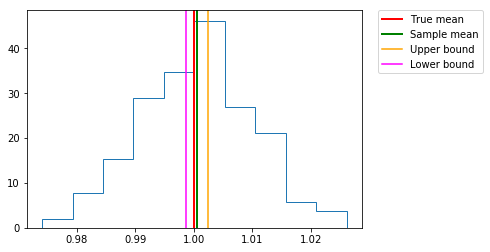

In [10]:
#fig,ax=plt.figure()
mu,sigma,Nmc=1,.01,100 # true mean, standard deviation of the measurements, number of simulations.
Simulated=random.normal(mu,sigma,Nmc) # get Nmc  simulated data points from distribution
s_e=np.std(Simulated)/np.sqrt(Nmc) # standard error of the mean
plt.hist(Simulated,normed=True,histtype='step') # plot the measurements
plt.axvline(mu,color='red',linewidth=2,label='True mean') # axvline plots a vertical line
plt.axvline(x=Simulated.mean(),color='green',linewidth=2,label='Sample mean')
plt.axvline(x=Simulated.mean()+1.97*s_e,color='orange',label='Upper bound')
plt.axvline(x=Simulated.mean()-1.97*s_e,color='magenta',label='Lower bound')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); # put the legend outside the plot

So as long as the green line (sample mean) falls between the upper and lower 95% confidence bounds, the null hypothesis cannot be rejected at the 95% level of confidence.  It will 'fail' 5% of the time.

### Practice with confidence bounds
- Run the above code cell until the red line is outside the confidence bounds
OR
- Rewrite the code to do this for you.
- Make the code do the simulation 1000 times and count the number of times the mean is outside the confidence bounds. 
- Calculate the fraction of times that is.
- Is it pretty close to 5%?  

But what if we DON'T know the true mean?  Instead, we have a set of  measurements that we made on the replica with a certain mean $\bar x_1$ and standard deviation $s_1$, and we want to know if a second set of measurements (with $\bar x_2,s_2$),  on a different 'meter' stick could have been made on the replica (or something identical)?  In other words do the two samples have the same mean:

$$H_o : \bar x_1 = \bar x_2.$$

For this kind of test, we use a version of Student's _t-test_ known as the Welch's t-test. (Student's t-test assumes that both samples have the same variance while Welch's allows the two variances to be different).   

We perform the calculations thusly:


Calculate the "Welch's t-test": 


$$t = \frac {\bar {x_1} - \bar {x_2}}{\sqrt { \frac {s_1^2}{n_1} + \frac {s_2^2}{n_2}}}$$

 To do this test we need to understand what _degrees of freedom_, $\nu$, are.  The _degrees of freedom_ is the number of data points you have minus the number of data points you need to calculate the statistic of interest. In this case we estimate $\nu$ like this:  



$$\nu \simeq \frac { \bigl( \frac {s_1^2}{n_1} +  \frac {s_2^2}{n_2} \bigr)^2  }{ \frac {s_1^4}{N_1^2\nu_1} +  \frac {s_2^4}{N_2^2\nu_2}    }$$

where $\nu_1 = n_1-1$ and $\nu_2 = n_2-1$. 


Once $t$ and 
$\nu$  have been calculated, these two statistics can be used with the t-distribution to test the null hypothesis that the two population means are equal.    

To our great joy, the **scipy.stats** module has a function **ttest_ind( )** which calculates the _t-test_ for us.  


In [11]:
import scipy.stats as stats
#help(stats.ttest_ind)


To use **stats.ttest_ind( )**, we pass it the two data sets and an option for a keyword **equal_var**. When this is set to **True**, the test is an ordinary Student's t-test which assumes that the variance in the two data sets is the same.  If we don't want to assume that, we use the Welch's version (different variances) by setting **equal_var** to **False**.  

**stats.ttest_ind( )**  returns something called the _p-value_ which, when compared to the level of confidence $\alpha$ (normally taken as .05 for 95% confidence), can tell us whether to reject the null hypothesis:  

$H_o: \bar x_1 = \bar x_2$

If the p-value is smaller than $\alpha$, then $H_o$ should be rejected.  

Let's try this by comparing  a second simulated data set with our first one:  



In [12]:
Simulated_2=random.normal(mu,sigma,Nmc) # get a second data set from the same distribution
print (stats.ttest_ind(Simulated,Simulated_2,equal_var=False)) # evaluate pvalue

Ttest_indResult(statistic=0.88966872349003778, pvalue=0.3747421522605352)


We can also assign the returned values to variables, say **stat** and **pvalue**:

In [13]:
stat,pvalue=stats.ttest_ind(Simulated,Simulated_2,equal_var=False)
print (stat)
print (pvalue)

0.88966872349
0.374742152261


So in this case, the p-value greatly exceeds the value of 0.05 for $\alpha$.  The null hypothesis can not be rejected and there is no great surprise that the two means (which were both drawn from distributions with a $\mu=1$) are the same.  

Let's try this with a different values of $\mu$  see what happens:  

In [14]:
for mu in np.arange(0,2,.1): # test this with values from 0 to 2
    Sim=random.normal(mu,sigma,Nmc)
    xbar=np.mean(Sim)
    # assign the returned statistics to variables stat, pvalue
    stat,pvalue=stats.ttest_ind(Simulated,Sim,equal_var=False)
    # compare original with various test cases and p-value (note the 'scientific' formatting)
    print ('%3.1f %5.3f %8.3e'%(np.mean(Simulated),xbar, pvalue) )

1.0 -0.001 0.000e+00
1.0 0.100 0.000e+00
1.0 0.199 2.565e-312
1.0 0.299 1.107e-307
1.0 0.400 4.180e-297
1.0 0.501 6.585e-281
1.0 0.601 2.800e-252
1.0 0.699 5.279e-239
1.0 0.800 6.504e-199
1.0 0.901 1.925e-148
1.0 1.001 6.767e-01
1.0 1.100 1.011e-143
1.0 1.201 2.654e-204
1.0 1.299 1.252e-234
1.0 1.400 1.253e-255
1.0 1.500 1.111e-279
1.0 1.602 2.931e-299
1.0 1.700 6.365e-311
1.0 1.802 0.000e+00
1.0 1.899 0.000e+00


So the only sample for which $H_o$ could not be rejected was the one with a $\mu$ of 1.  Not really surprising... 

### Practice with t-tests
- Simulate two data sets as above, with  standard deviations of .01 and .1 respectively.  For the first sample, use a mean of 1, but  vary the mean of the second sample between 0 and 2 at .1 increments. 
- Calculate Welch's t-test for the two data sets. 
- What are the range of means are not statistically different from 1.  

#### Comparison of variances

Now let's say we are more interested in comparing the variances instead of the means. For example, is a particular measurement method superior (lower variance) than another.  Say we have a bunch of students (100)  'eyeball' a sedimentary bed that is approximately 1 meter thick,  guessing how long it is in meters.   Are these measurements significantly more scattered than if we made the measurements with a tape measure?   

To compare variances, we use a different test - the _F-test_.  The _F-test_ is based on a theoretical probability distribution know at the _F-distribution_ which is the theoretical distribution of values that would be expected by a random sampling of a normal population and calculating the ratios of variances.  The _F_ statistic is: 

$$ F = \frac {s_1^2}{s_2^2}$$.  

We also need to know the _degrees of freedom_ here and here $\nu$ is $N-1$ for each sample.   


There is a function for this too (whew! - otherwise you have to look up F tables online or something).   For that we calculate $F$ as above and $\nu_1,\nu_2$, then call **scipy.stats.f.cdf**:



In [15]:
help(stats.f.cdf) # we already imported scipy

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x, *args, **kwds) method of scipy.stats._continuous_distns.f_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `x`



So, given our two data sets, let's try to see if the variances are statistically different. 

In [18]:
alpha=0.05 # set the level of confidence desired (this is for 95% confidence)
s_1,s_2=np.std(Simulated),np.std(Simulated_2) # get the two standard deviations
F=s_1**2/s_2**2 # evaluate F, the ratio of the two variances
nu_1,nu_2=len(Simulated)-1,len(Simulated_2)-1 # get the two degrees of freedom
pvalue=stats.f.cdf(F,nu_1,nu_2) # get the F ratio value for the test
print ('F=%4.2f p=%4.2f alpha=%4.2f'%(F,pvalue,alpha)) # print them out
if pvalue<alpha: # fails the test
    print ('null hypothesis rejected, the two variances are different')
else: # passes the test
    print ('null hypothesis NOT rejected - the two variances are not different')


F=0.77 p=0.09 alpha=0.05
null hypothesis NOT rejected - the two variances are not different


### Practice with F-tests
- Repeat the above F-test but use a range of standard deviations for the second simulated data set, varying between .01 and .1 at .01 increments.  
- What is the range of values for the standard deviations that cannot be distiguished?  

### Non-parametric tests. 

Obviously, there are a lot of different statistical tests that we could do.  Most of them ASSUME that the data were drawn from a particular type of distribution, i.e., the normal distribution.  But as we already saw in the last lecture, distributions are not always normally distributed.  Many, like grain size data, are most definitely NOT normally distributed.  So what do we do to make these kinds of tests?  

### The bootstrap

If we have a LOT of data and we can safely assume that the underlying distribution is represented by the data, we can do a statistical test known as the _bootstrap_.  The bootstrap is very much like the Monte Carlo approach we are by now very familiar with.  But instead of simulating data, we draw random samples from our own data and perform the test on these _pseudo samples_.    

For example,  let's imagine a case where we have two data sets from some weird distribution.  I'm going to use the lognormal one because I can simulate it and it is not "normal".   


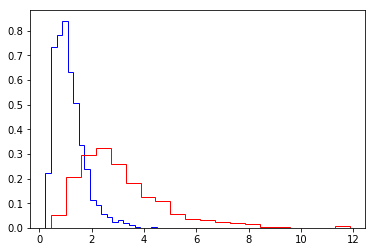

In [19]:
mu_1,sigma_1,mu_2,sigma_2=0,.5,1,.5
Nmc=1000 # number of Monte Carlo simultions
Simulated_3=random.lognormal(mu_1,sigma_1,Nmc) # get Nmc  simulated data points from distribution
plt.hist(Simulated_3,normed=True,bins=20,histtype='step',color='blue') # plot them  - notice the new histtype
Simulated_4=random.lognormal(mu_2,sigma_2,Nmc) # get Nmc  simulated data points from distribution
plt.hist(Simulated_4,normed=True,bins=20,histtype='step',color='red'); # plot them  - notice the new histtype





How do we know if the two means are the same?  We can't use the t-test because that assumes a normal distribution whereas these data are clearly not normal.  

Well, we can calculate the mean (or better yet the mode), then repeat the calculation on a large number  ($N_b$) of  _pseudo-samples_.  A _pseudo-sample_   is a _sample_ (in the statistical sense) created by randomly selecting data points from the original sample. This will give a distribution of means (or modes).  We do this on both data sets.  If the bounds containing 95% of the means (or modes) of each data set overlap, bingo, the means (or modes) are the same.  

Because we want to do this twice, we should make a function that: 
- Draws $N_b$ pseudosamples from a sample and calculates the mean on them.  
- Sorts the $N_b$ means and finds the bounds containing, say, 95% of them.
- Returns these lower and upper bounds of $N_bs$ means, depending on $\alpha$.   

To do this, our function can call **random.choice( )**  which will save us a lot of headache:  

In [20]:
help(random.choice)

Help on built-in function choice:

choice(...) method of mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
            .. versionadded:: 1.7.0
    
    Parameters
    -----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if a was np.arange(n)
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement
    p : 1-D array-like, optional
        The probabilities associated with each entry in a.
        If not given the sample assumes a uniform distribution over all
        entries in a.
    
    Returns
    --------
    samples : 1-D ndarray, s

Here is a little function called **bootstrap( )** I wrote (you are welcome), which does what we want.  

In [21]:
def bootstrap(Nb, sample,alpha):
    """
    chooses Nb pseudosamples from sample, 
    calculates means and returns the lower and upper confidence bounds, dependent on alpha
    """
    Ns=len(sample) # get the number of data points in the sample
    bootstrapped_means=[] # make a list for the means
    for i in range(Nb):# do this Nb times
        # random.choice gets us the pseudosample
        pseudo_sample=random.choice(sample,size=len(sample),replace=True) 
        bootstrapped_means.append(pseudo_sample.mean()) # appends the mean
    bootstrapped_means=sorted(bootstrapped_means) # sort the means
    upper_bound_index=int((1.-alpha/2.)*Nb) # get the index for the upper bound
    lower_bound_index=Nb-int((1.-alpha/2.)*Nb) # same for lower bound
    return bootstrapped_means[lower_bound_index],bootstrapped_means[upper_bound_index]
    

In [22]:
# check it out: 
lower_bound,upper_bound=bootstrap(10,Simulated_3,.05)
print (Simulated_3.mean()) # calculate the mean of the distribution
print (lower_bound,upper_bound) # calculate the 95% bounds (alpha=.05)

1.14043420851
1.12392024397 1.19553507616


Well, that seems to have worked because the mean falls between the two confidence bounds.    

Our next task will be to plot the two sets of bounds on our histogram and see if they overlap each other.  



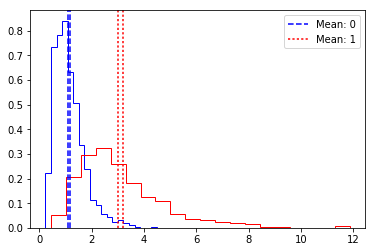

In [23]:
# replot our data sets: 

plt.hist(Simulated_3,normed=True,bins=20,histtype='step',color='blue') # plot them  - notice the new histtype
plt.hist(Simulated_4,normed=True,bins=20,histtype='step',color='red'); # plot them  - notice the new histtype
Nb=1000 # let's get 1000 bootstrapped means (the more the merrier)
lower_bound_1,upper_bound_1=bootstrap(Nb,Simulated_3,.05) # get the bounds for first set
lower_bound_2,upper_bound_2=bootstrap(Nb,Simulated_4,.05) # get the bounds for second set
plt.axvline(lower_bound_1,color='blue',linestyle='dashed', label="Mean: 0")# put on one bound
plt.axvline(upper_bound_1,color='blue',linestyle='dashed')# put on one bound
plt.axvline(lower_bound_2,color='red',linestyle='dotted', label="Mean: 1")# put on one bound
plt.axvline(upper_bound_2,color='red',linestyle='dotted')# put on one bound
plt.legend();



And the two data sets are statistically distinct at the 95% confidence level.  We can repeat this exercise with two new simulated data sets, drawn from populations with the same mean and see if you get a different answer:  

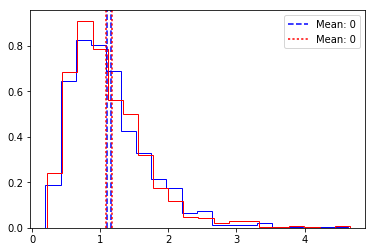

In [24]:
mu_1,sigma_1,mu_2,sigma_2=0,.5,0,.5
Nmc=1000 # number of monte carlo simultions
Simulated_5=random.lognormal(mu_1,sigma_1,Nmc) # get Nmc  simulated data points from distribution
Simulated_6=random.lognormal(mu_2,sigma_2,Nmc) # get Nmc  simulated data points from distribution

# rinse, repeat: 
plt.hist(Simulated_5,normed=True,bins=20,histtype='step',color='blue') # plot them  - notice the new histtype
plt.hist(Simulated_6,normed=True,bins=20,histtype='step',color='red'); # plot them  - notice the new histtype
Nb=1000 # let's get 1000 bootstrapped means (the more the merrier)
lower_bound_1,upper_bound_1=bootstrap(Nb,Simulated_5,.05) # get the bounds for first set
lower_bound_2,upper_bound_2=bootstrap(Nb,Simulated_6,.05) # get the bounds for second set
plt.axvline(lower_bound_1,color='blue',linestyle='dashed', label="Mean: 0")# put on one bound
plt.axvline(upper_bound_1,color='blue',linestyle='dashed')# put on one bound
plt.axvline(lower_bound_2,color='red',linestyle='dotted', label="Mean: 0")# put on one bound
plt.axvline(upper_bound_2,color='red',linestyle='dotted')# put on one bound
plt.legend();



Now the uncertainty bounds overlap.  As they should!  

You can do this same type of thing calculating modes, means, standard deviations or pretty much anything you like.  

### The jackknife


The jacknife is similar to the bootstrap, but instead of resampling the sample with the same number of data points, we delete one of the data points, calculate the statistic of interest, then delete the next, until we have repeated it N times. This is called the _delete one_ jackknife.  You can also do a delete-two jackknife or more, depending on how many data points are in the sample.   

### Practice

- Modify the bootstrap function to do a delete-1 jackknife instead.  